In [1]:
#SIMULASI DENGAN PEMBELAJARAN MODULE DQLAB

In [2]:
#Pemanggilan library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Pemanggilan data iris.csv

iris = pd.read_csv('iris.csv')
print(iris)
iris.shape


print(iris.describe())
print(iris.corr())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:

def removal(outliers) :
    for i in outliers :
        lower = int(i.quantile(0.05));
        upper = int(i.quantile(0.99));
    return outliers

remove = iris['SepalLengthCm'].removal
remove

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

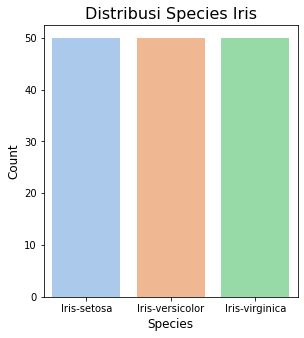

In [4]:
#checking Distribution of Iris with barplot
plt.rcParams['figure.figsize'] = (10,5)
plt.subplot(1,2,1)
sns.countplot(iris['Species'], palette='pastel')
plt.title('Distribusi Species Iris', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [5]:
#Data Pre-processing : Handling missing value

#mengecek missing value 
missing_value = iris.isnull().sum()
print(missing_value)

'''
Berdasarkan data iris.csv, diketahui bahwa tidak ada data yang kosong atau tidak ada missing value.
Oleh karena itu, kita bisa melanjutkan pengolahan ke tahap selanjutnya.
'''

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


'\nBerdasarkan data iris.csv, diketahui bahwa tidak ada data yang kosong atau tidak ada missing value.\nOleh karena itu, kita bisa melanjutkan pengolahan ke tahap selanjutnya.\n'

In [6]:
#Data Pre-processing : Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
iris_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
iris[iris_columns] = scaler.fit_transform(iris[iris_columns])
print(iris[iris_columns].describe().T[['min','max']])


'''
Tujuan dari Scaling yaitu untuk menyamakan rentang nilai antara variabel feature. Dengan menggunakan model
MinMaxScaler, kita dapatkan disini nilai min nya yaitu 0 dan max nya yaitu 1.
'''

               min  max
SepalLengthCm  0.0  1.0
SepalWidthCm   0.0  1.0
PetalLengthCm  0.0  1.0
PetalWidthCm   0.0  1.0


'\nTujuan dari Scaling yaitu untuk menyamakan rentang nilai antara variabel feature. Dengan menggunakan model\nMinMaxScaler, kita dapatkan disini nilai min nya yaitu 0 dan max nya yaitu 1.\n'

In [7]:
#Feature and Label

X = iris.drop(['Species'], axis=1)
y = iris['Species']

print(X.shape)
print(y.shape)

(150, 5)
(150,)


In [8]:
#Training and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Checking shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 5)
(30, 5)
(120,)
(30,)


In [9]:
#Training Fit
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# fit the classifier to the training
model = model.fit(X_train, y_train)

#predict 
y_pred = model.predict(X_test)

#Cheking shape
print(y_pred.shape)




(30,)


In [10]:
#Model Evaluation Performance

from sklearn.metrics import confusion_matrix, classification_report

#Evaluation model
print('Training accuracy :', model.score(X_train, y_train))
print('Test accuracy ', model.score(X_test, y_test))

#confution matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training accuracy : 1.0
Test accuracy  0.9666666666666667
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [11]:
#Penambahan data untuk percobaan model

data_baru = [[5,5.5,3,2,0],
            [4,5,4.3,3,0]]
preds = model.predict(data_baru)
print(preds)

'''
Model sudah berhasil mendeteksi data baru dengan mengkasifikasikan
'''

['Iris-setosa' 'Iris-setosa']


'\nModel sudah berhasil mendeteksi data baru dengan mengkasifikasikan\n'